In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re


# Ganti 'nama_file.csv' dengan nama file dataset kamu
df = pd.read_csv('datasets/dataset.csv')




In [2]:

print("=============================================")
print("          1. CEK DATA HILANG (MISSING)")
print("=============================================")
# Menghitung jumlah data hilang di setiap kolom
missing_values = df.isnull().sum()
print("Jumlah data hilang per kolom:")
print(missing_values)
print("\n")



          1. CEK DATA HILANG (MISSING)
Jumlah data hilang per kolom:
video_id           0
title              0
channel_name       0
tanggal            0
author             0
komentar           0
label              0
komentar_clean     0
predicted_label    0
dtype: int64




In [3]:

print("=============================================")
print("           2. CEK DATA DUPLIKAT")
print("=============================================")
# Menghitung jumlah baris data yang terduplikasi
duplicate_rows = df.duplicated().sum()
print(f"Total baris data duplikat ditemukan: {duplicate_rows} baris\n")

# Opsional: Menampilkan baris yang duplikat (jika ada)
if duplicate_rows > 0:
    print("Contoh baris data yang duplikat:")
    print(df[df.duplicated(keep=False)]) # 'keep=False' akan menampilkan semua baris duplikat
print("\n")



           2. CEK DATA DUPLIKAT
Total baris data duplikat ditemukan: 0 baris





In [ ]:

print("=============================================")
print("            3. CEK OUTLIER (Teks)")
print("=============================================")
# Untuk data teks, outlier bisa dideteksi dari panjangnya (jumlah kata atau karakter)
# Kita akan membuat kolom baru untuk menyimpan panjang komentar dalam jumlah kata

# Pastikan tidak ada nilai NaN di kolom 'komentar' sebelum split
df['panjang_komentar'] = df['komentar'].dropna().str.split().str.len()

print("Statistik deskriptif untuk panjang komentar:")
# .describe() akan memberikan gambaran statistik (rata-rata, min, max, kuartil)
print(df['panjang_komentar'].describe())
print("\n")


            3. CEK OUTLIER (Teks)
Statistik deskriptif untuk panjang komentar:
count    10230.000000
mean         6.965982
std          3.308467
min          1.000000
25%          5.000000
50%          7.000000
75%          9.000000
max         43.000000
Name: panjang_komentar, dtype: float64




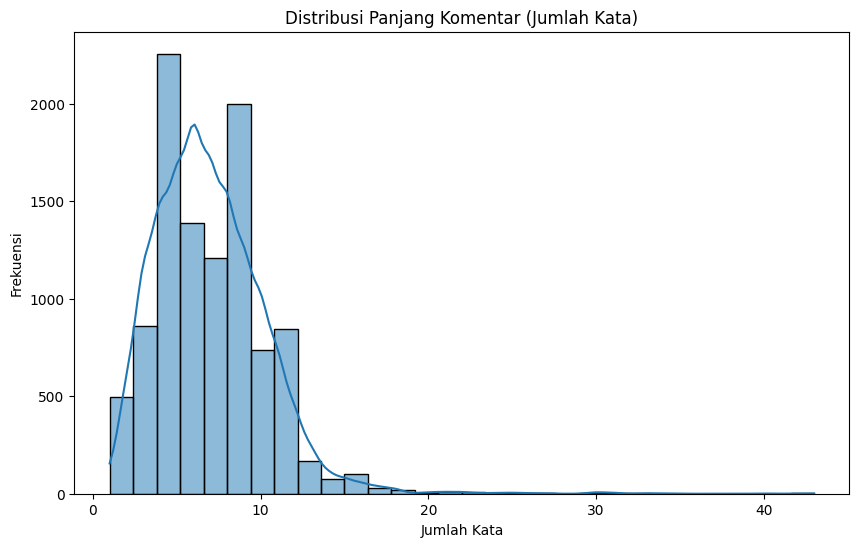

In [ ]:

# Visualisasi untuk melihat distribusi panjang komentar
plt.figure(figsize=(10, 6))
sns.histplot(df['panjang_komentar'], bins=30, kde=True)
plt.title('Distribusi Panjang Komentar (Jumlah Kata)')
plt.xlabel('Jumlah Kata')
plt.ylabel('Frekuensi')
plt.show()


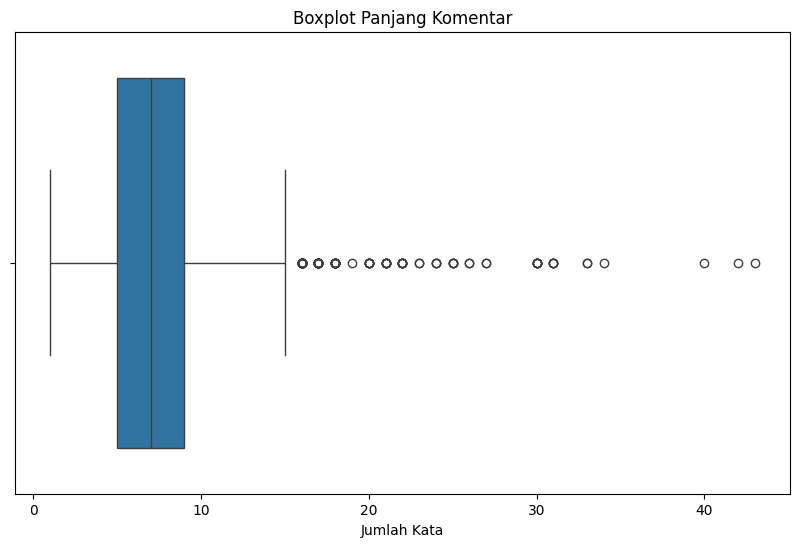

In [ ]:

# Membuat boxplot untuk melihat outlier dengan lebih jelas
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['panjang_komentar'])
plt.title('Boxplot Panjang Komentar')
plt.xlabel('Jumlah Kata')
plt.show()

Memulai proses Exploratory Data Analysis (EDA)...

--- Menganalisis Distribusi Label ---


C:\Users\Rizki\AppData\Local\Temp\ipykernel_452\925702647.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='label', data=df, palette=['#3498db', '#e74c3c']) # Biru untuk non-spam, Merah untuk spam


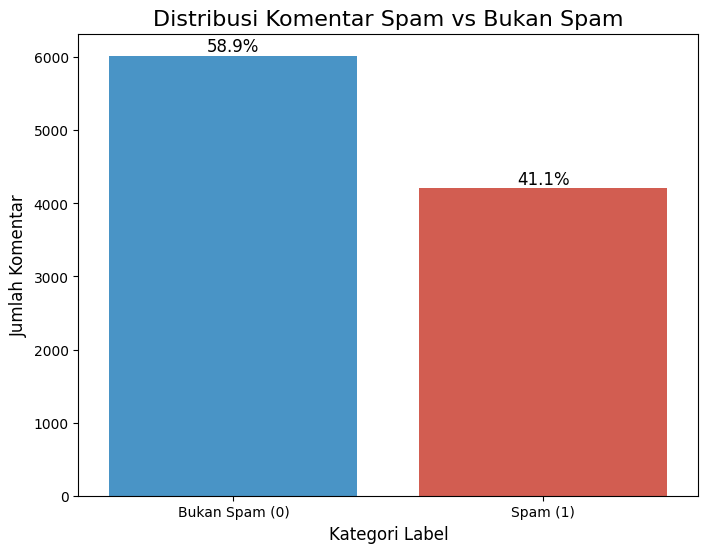


--- Menganalisis Kata Kunci (Word Cloud & Frekuensi N-gram) ---


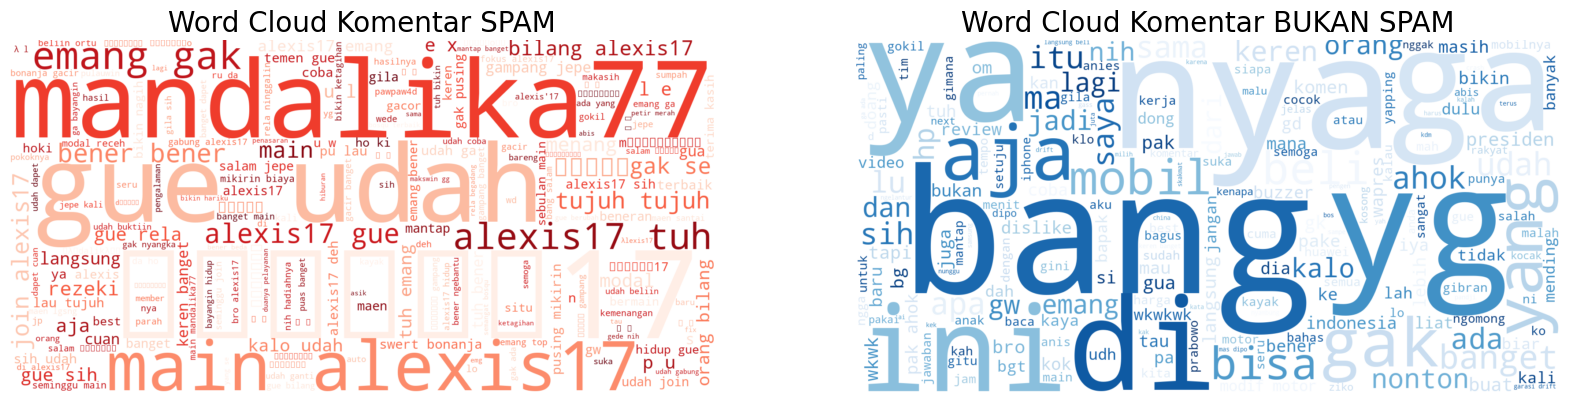

C:\Users\Rizki\AppData\Local\Temp\ipykernel_452\925702647.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='bigram', data=df_spam_bigrams, palette='viridis')


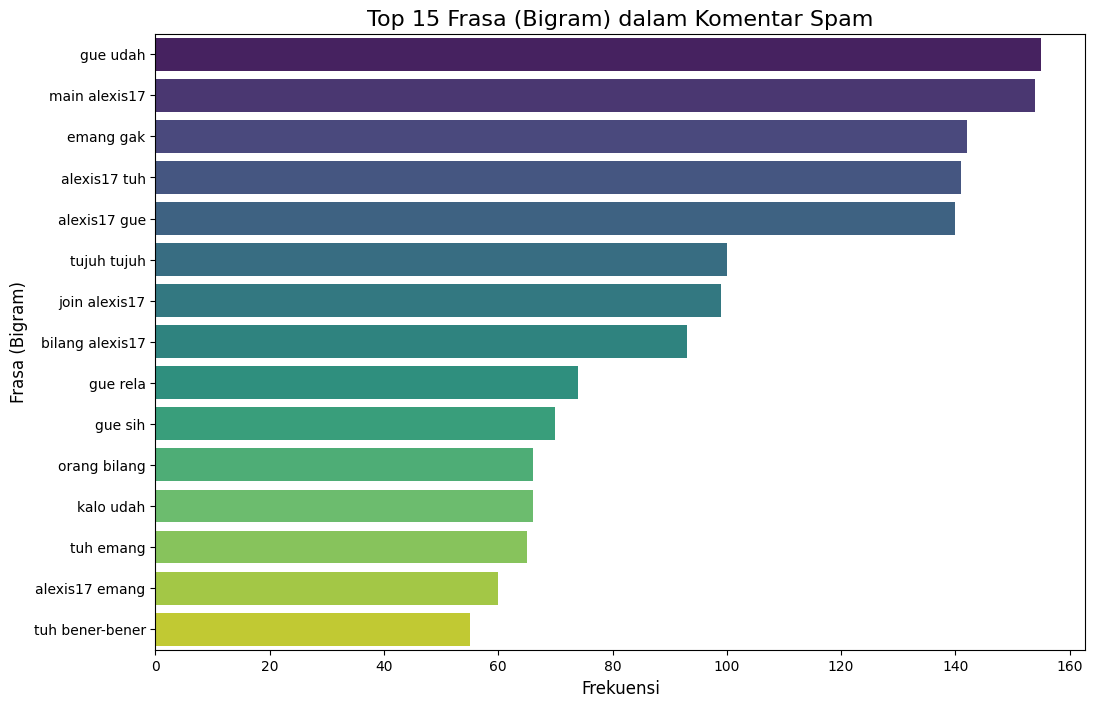


Proses EDA selesai.


In [ ]:


print("Memulai proses Exploratory Data Analysis (EDA)...")

# --- 1. ANALISIS DISTRIBUSI LABEL ---
print("\n--- Menganalisis Distribusi Label ---")
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='label', data=df, palette=['#3498db', '#e74c3c']) # Biru untuk non-spam, Merah untuk spam

# Menambahkan judul dan label
plt.title('Distribusi Komentar Spam vs Bukan Spam', fontsize=16)
plt.xlabel('Kategori Label', fontsize=12)
plt.ylabel('Jumlah Komentar', fontsize=12)
plt.xticks([0, 1], ['Bukan Spam (0)', 'Spam (1)'], fontsize=10)

# Menambahkan persentase di atas bar
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12)

plt.show()


# --- 2. ANALISIS KATA KUNCI (PENGGANTI KORELASI) ---
print("\n--- Menganalisis Kata Kunci (Word Cloud & Frekuensi N-gram) ---")

# Memisahkan data berdasarkan label dan memastikan tidak ada nilai null
df['komentar_clean'] = df['komentar_clean'].astype(str) # Pastikan semua data adalah string
spam_comments_df = df[df['label'] == 1]
non_spam_comments_df = df[df['label'] == 0]

# Menggabungkan semua komentar menjadi satu teks besar untuk setiap kategori
spam_text = " ".join(comment for comment in spam_comments_df.komentar_clean)
non_spam_text = " ".join(comment for comment in non_spam_comments_df.komentar_clean)

# A. Membuat dan Menampilkan Word Cloud
if spam_text and non_spam_text: # Cek jika ada teks untuk diproses
    wordcloud_spam = WordCloud(width=1600, height=800, background_color='white', colormap='Reds').generate(spam_text)
    wordcloud_non_spam = WordCloud(width=1600, height=800, background_color='white', colormap='Blues').generate(non_spam_text)

    # Menampilkan Word Cloud berdampingan
    fig, axes = plt.subplots(1, 2, figsize=(20, 10))

    axes[0].imshow(wordcloud_spam, interpolation='bilinear')
    axes[0].set_title('Word Cloud Komentar SPAM', fontsize=20)
    axes[0].axis('off')

    axes[1].imshow(wordcloud_non_spam, interpolation='bilinear')
    axes[1].set_title('Word Cloud Komentar BUKAN SPAM', fontsize=20)
    axes[1].axis('off')

    plt.show()
else:
    print("Tidak cukup data untuk membuat Word Cloud.")

# B. Analisis Frekuensi N-gram (contoh: Bigram/2 kata)
def get_top_ngrams(corpus, n=None, gram=2):
    """Fungsi untuk mendapatkan n-gram paling umum dari sebuah teks."""
    # Menghapus kata-kata yang sangat pendek atau hanya angka
    words = [word for word in re.split(r'\s+', corpus) if len(word) > 2 and not word.isdigit()]
    ngrams = zip(*[words[i:] for i in range(gram)])
    ngram_counts = Counter([" ".join(ngram) for ngram in ngrams])
    return ngram_counts.most_common(n)

# Mendapatkan 15 bigram teratas dari komentar spam
top_spam_bigrams = get_top_ngrams(spam_text, n=15, gram=2)

if top_spam_bigrams:
    # Membuat DataFrame untuk visualisasi
    df_spam_bigrams = pd.DataFrame(top_spam_bigrams, columns=['bigram', 'count'])

    # Visualisasi Bigram
    plt.figure(figsize=(12, 8))
    sns.barplot(x='count', y='bigram', data=df_spam_bigrams, palette='viridis')
    plt.title('Top 15 Frasa (Bigram) dalam Komentar Spam', fontsize=16)
    plt.xlabel('Frekuensi', fontsize=12)
    plt.ylabel('Frasa (Bigram)', fontsize=12)
    plt.show()
else:
    print("Tidak cukup data untuk analisis N-gram pada komentar spam.")

print("\nProses EDA selesai.")